**Importing Required Libraries.**

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [8]:
data=pd.read_csv('/traffic.csv')
print("SIZE OF THE DATASET IS",data.shape)
data

SIZE OF THE DATASET IS (391, 2)


,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973
...,...,...
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


**CONVERT THE DATATYPE OF DATE COLUMN TO DATETIME.**

In [10]:
data['Date']=pd.to_datetime(data["Date"],format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


Our website traffic data is **seasonal** because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know **if the dataset is seasonal or not while working on the problem of Time Series Forecasting**.
We can see by **visual Inspection** but to clarify still well go with statistical method.I'll be using **Augmented Dickey Fuller test -adfuller test**


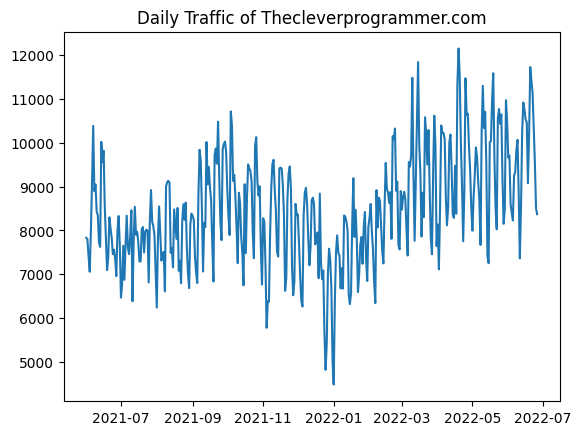

In [12]:
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.plot(data['Date'],data['Views'])

In [15]:
!pip install statsmodels

In [21]:
from statsmodels.tsa.stattools import adfuller

data_test=adfuller(data['Date'],autolag='AIC')
print("1.ADF : ",data_test[0])
print("2.p-value : ",data_test[1])
print("3.Num of Lags : ",data_test[2])

1.ADF :  -0.05849266038878868
2.p-value :  0.9534190753423448
3.Num of Lags :  16


**We can see that p-value(Probability Value) is greater than 0.05 , Hence it can be confirmed that it is Seasonal.**

<Figure size 640x480 with 0 Axes>

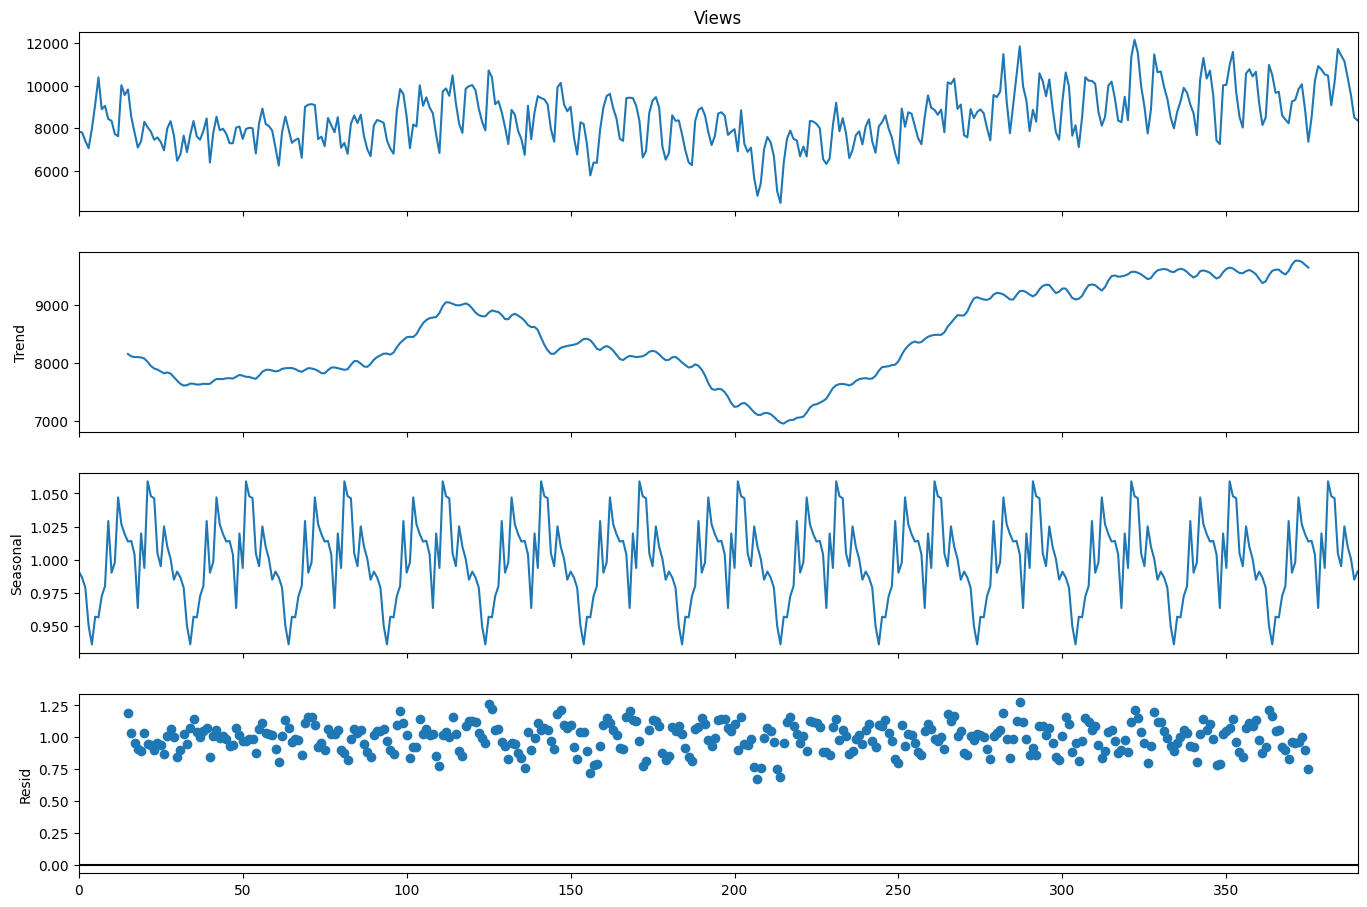

In [22]:
result = seasonal_decompose(data["Views"],
                            period=30,
                            model='multiplicative',
                            )

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

**I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values.Since it is not Stationary so d value is 1.For p and q value i'll use partial correleation plots. **

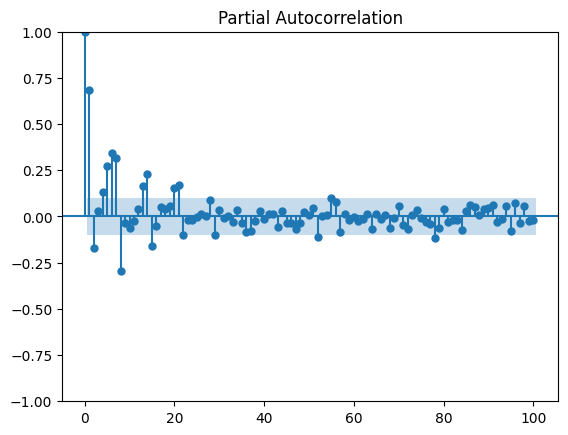

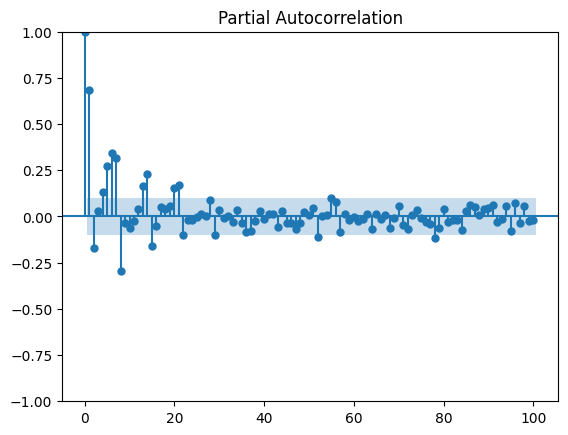

In [24]:
plot_pacf(data["Views"], lags = 100)

**The p and q values are 5 and 2 .Now We can train a SARIMA model for the task of website traffic forecasting:**

In [25]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.052
Date:                            Fri, 25 Aug 2023   AIC                           6228.104
Time:                                    13:15:39   BIC                           6287.127
Sample:                                         0   HQIC                          6251.530
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7394      0.130      5.696      0.000       0.485       0.994
ar.L2         -0.7892      0.134   

**Now let’s forecast traffic on the website for the next 40 days:**

In [28]:
predictions = model.predict(len(data), len(data)+40)
print(predictions)

391     9885.647737
392    10855.361597
393    10725.051365
394     9828.059279
395     8824.289414
396     8300.183783
397     8949.513213
398     9745.277758
399    10353.338143
400    10578.741349
401     9883.800360
402     9329.632515
403     9005.638396
404     9078.941894
405    10487.891086
406    11009.439207
407    10916.618529
408    10089.760403
409     9422.263831
410     8629.263400
411     9164.667004
412    10344.709609
413    10703.173078
414    10851.358088
415    10275.869403
416     9425.038450
417     8988.807212
418     9178.557035
419    10003.114691
420    10369.257029
421    10786.438347
422     9937.805230
423     9529.679920
424     8978.573003
425     8889.000917
426    10212.106718
427    10936.393657
428    10940.448619
429    10350.456919
430     9403.312126
431     8676.332354
Name: predicted_mean, dtype: float64


**plotting  the predictions:**

<Axes: >

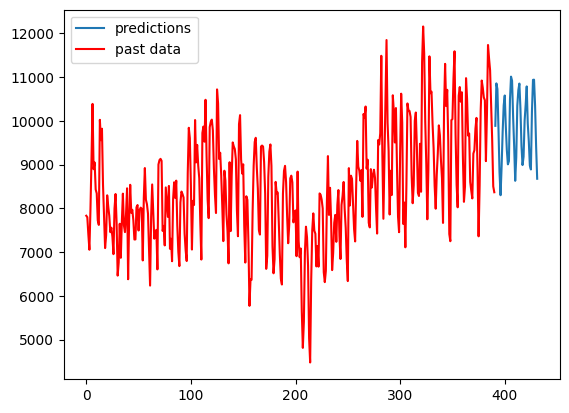

In [36]:
predictions.plot(legend=True,label="predictions")
data['Views'].plot(color='red',label="past data",legend=True)